 # Introducción a Pandas con un Dataset Médico



 En este notebook vamos a aprender a usar `pandas` para:



 1. Cargar un dataset en un DataFrame

 2. Inspeccionar datos (ver filas, columnas, tipos)

 3. Seleccionar y modificar variables

 4. Crear y transformar columnas

 5. Hacer una exploración inicial básica

 6. **(Avanzado)** Manejo de valores nulos y operaciones complejas

 7. **(Avanzado)** Visualización mejorada

 8. **(Avanzado)** Ejercicios propuestos



In [ ]:
# Importar pandas y librerías adicionales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Cargar el dataset
df = pd.read_csv("./data/heart_disease_dataset.csv")


 ## Contexto del dataset

 Origen: https://archive.ics.uci.edu/dataset/45/heart+disease?utm_source=chatgpt.com

 Este dataset contiene información médica de pacientes y su relación con enfermedades cardíacas.

 - `age`: Edad del paciente.

 - `sex`: 0 = Mujer, 1 = Hombre.

 - `chol`: Nivel de colesterol en suero (mg/dL).

 - `num`: Presencia de enfermedad cardíaca (0 = No, 1-4 = Sí). 

 Para más información visitar el link

 ## 1. Inspección básica del DataFrame

In [18]:
# Mostrar las primeras filas
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [19]:
# Ver dimensiones del DataFrame (filas, columnas)
df.shape


(303, 14)

In [20]:
# Ver nombres de columnas
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [21]:
# Tipos de datos de cada columna
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [22]:
# Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


 ## 2. Seleccionar columnas y filas

In [23]:
df["age"].head()


0    63
1    67
2    67
3    37
4    41
Name: age, dtype: int64

In [24]:
# Seleccionar varias columnas
df[["age", "sex", "num"]].head()


,age,sex,num
0,63,1,0
1,67,1,2
2,67,1,1
3,37,1,0
4,41,0,0


In [25]:
# Seleccionar una fila por índice
df.iloc[0]


age          63.0
sex           1.0
cp            1.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       2.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         3.0
ca            0.0
thal          6.0
num           0.0
Name: 0, dtype: float64

In [26]:
# Seleccionar varias filas por rango
df.iloc[0:5]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


 ## 3. Crear y modificar variables

In [27]:
# Crear una nueva columna: edad en décadas
df["age_decade"] = (df["age"] // 10) * 10
df[["age", "age_decade"]].head()


,age,age_decade
0,63,60
1,67,60
2,67,60
3,37,30
4,41,40


In [28]:
# Modificar una columna existente: pasar colesterol a mg/dL normalizados
df["chol_normalized"] = df["chol"] / df["chol"].max()
df[["chol", "chol_normalized"]].head()


,chol,chol_normalized
0,233,0.413121
1,286,0.507092
2,229,0.406028
3,250,0.443262
4,204,0.361702


In [29]:
# Reemplazar valores: mapear 0 y 1 de la variable 'sex'
df["sex_label"] = df["sex"].map({0: "Mujer", 1: "Hombre"})
df[["sex", "sex_label"]].head()


,sex,sex_label
0,1,Hombre
1,1,Hombre
2,1,Hombre
3,1,Hombre
4,0,Mujer


In [30]:
# Crear variable categórica a partir de continua
df["age_group"] = pd.cut(df["age"], bins=[0,30,40,50,60,70,100],
                         labels=["<30","30-39","40-49","50-59","60-69","70+"])
df[["age","age_group"]].head()


,age,age_group
0,63,60-69
1,67,60-69
2,67,60-69
3,37,30-39
4,41,40-49


 ## 4. Exploración inicial de los datos

In [33]:
# Estadísticas descriptivas de todas las columnas numéricas
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_decade,chol_normalized
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,49.933993,0.437399
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,9.242624,0.091803
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,20.000000,0.223404
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,40.000000,0.374113
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,50.000000,0.427305
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,60.000000,0.487589
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,70.000000,1.000000


In [34]:
# Contar valores de una columna categórica
df["sex_label"].value_counts()


sex_label
Hombre    206
Mujer      97
Name: count, dtype: int64

In [35]:
# Tabla cruzada entre variables
pd.crosstab(df["sex_label"], df["num"])


num,0,1,2,3,4
sex_label,,,,,
Hombre,92,46,29,28,11
Mujer,72,9,7,7,2


 ## **(Avanzado) 5. Manejo de valores nulos y operaciones complejas**

In [36]:
# Detectar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
age                0
sex                0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
num                0
age_decade         0
chol_normalized    0
sex_label          0
age_group          0
dtype: int64


In [39]:
# Tratar nulos: rellenar con la media
df["chol"].fillna(df["chol"].mean(), inplace=True)


/var/folders/hj/z81bpvv52rxg939nrr4_8qp00000gn/T/ipykernel_41828/3254845195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chol"].fillna(df["chol"].mean(), inplace=True)


In [40]:
# Aplicar una función personalizada: clasificar colesterol
df["chol_category"] = df["chol"].apply(lambda x: "Alto" if x > 240 else "Normal")
df[["chol", "chol_category"]].head()


,chol,chol_category
0,233,Normal
1,286,Alto
2,229,Normal
3,250,Alto
4,204,Normal


 ## **(Avanzado) 6. Visualización**

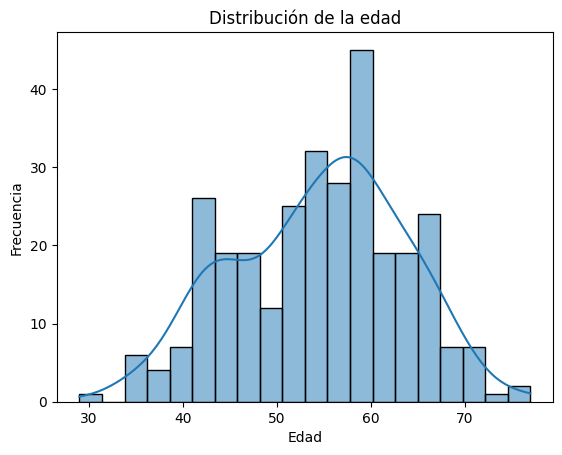

In [41]:
# Histograma de la edad con seaborn y KDE
sns.histplot(df["age"], bins=20, kde=True)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la edad")
plt.show()


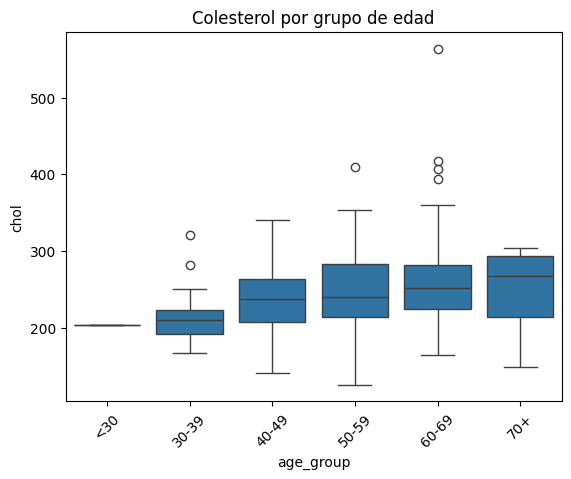

In [42]:
# Boxplot de colesterol por grupo de edad
sns.boxplot(x="age_group", y="chol", data=df)
plt.title("Colesterol por grupo de edad")
plt.xticks(rotation=45)
plt.show()


 ## **(Avanzado) 7. Ejercicios propuestos**



 1. Crea una columna que clasifique la presión arterial (`trestbps`) en "Normal" (<120), "Elevada" (120-129) y "Alta" (≥130).

 2. Calcula la media de colesterol (`chol`) para hombres y mujeres.

 3. Guarda el DataFrame modificado en un nuevo archivo CSV llamado `heart_disease_modificado.csv`. (busca como hacerlo on-line)